A1.2 Regresión lineal simple

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import t
import statsmodels.api as sm

1. Se imprimen los 10 paises con mayor índices de felicidad

In [24]:
data = pd.read_csv("A1.2 Felicidad y GDP.csv")
data = data.sort_values("Felicidad",ascending=False)
print(data.head(10))

          Pais  Felicidad           GDP
0      Finland     7.8210  2.718370e+11
1      Denmark     7.6362  3.560850e+11
2      Iceland     7.5575  2.171808e+10
3  Switzerland     7.5116  7.522480e+11
4  Netherlands     7.4149  9.138650e+11
5   Luxembourg     7.4040  7.335313e+10
6       Sweden     7.3843  5.414870e+11
7       Norway     7.3651  3.621980e+11
8       Israel     7.3638  4.071010e+11
9  New Zealand     7.1998  2.117350e+11


2. Gráfico de log10(GDP) contra el nivel de felicidad

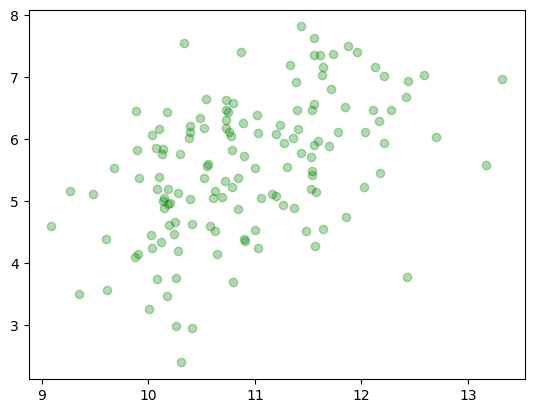

In [4]:
%matplotlib inline
plt.scatter(y=data.Felicidad,x=np.log10(data.GDP),color="green",alpha=0.3)
plt.show()

3. Cálculo de los valores óptimos de los coeficientes con base a modelo de regresión lineal simple

In [6]:
x = data.GDP
y = data.Felicidad

xmean = np.mean(x)
ymean = np.mean(y)

B1 = np.sum((x-xmean)*(y-ymean))/np.sum((x-xmean)**2)
B0 = ymean - B1 * xmean
print("xmean: ", xmean)
print("ymean: ", ymean)
print("B1: ", B1)
print("B0: ", B0)

xmean:  588994202378.1418
ymean:  5.560004247886525
m:  9.439828482924405e-12
B1:  8.508816084237203e-14
B0:  5.509887814459349


4. Gráfico con modelo lineal.

[0.97203903 4.61185235 2.57298458 3.6983996  0.26494194 2.07139893
 1.0671702  2.92287607 1.66776216 3.03793509 2.92379912 0.55417608
 1.84717667 2.49468685 1.50111302 2.34578837 4.89937712 3.91912639
 5.3973599  2.70024713 2.92753603 4.86350434 0.81303275 3.82994174
 3.24094981 3.62396826 3.78154699 5.26514144 0.46200093 3.80379807
 5.01203045 4.78933762 0.52636524 4.1358755  2.47615311 4.21583132
 5.30724732 2.24100319 0.80818444 5.45446937 0.34307959 3.93325791
 1.13246402 4.11520746 0.89982492 2.92272466 1.04163004 3.476437
 0.02602666 5.47826369 5.21399098 3.04642668 2.31463646 0.85417062
 0.63192224 1.22480099 0.18665506 3.24918359 2.375297   4.63082797
 3.34943176 0.48653862 0.10494289 3.36622311 3.72728806 0.7431797
 3.5114977  3.29272612 1.28594242 4.01886508 5.40080763 5.265345
 3.74349938 3.10135941 3.05211656 2.54007762 1.9067764  1.97738349
 1.07711419 2.96173445 4.93649012 0.26630677 0.09826503 2.15112898
 3.46361763 1.01726673 0.81673355 3.62030943 4.06269838 1.58008429


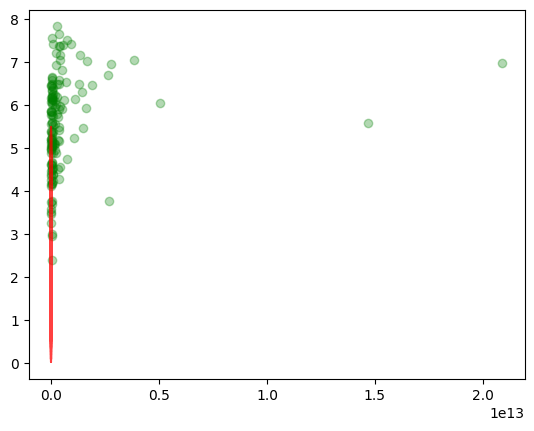

In [8]:
X = np.random.rand(120)
Y = X*B0 + B1
print(Y)
plt.scatter(y=y,x=x,color="green",alpha=0.3)
plt.plot(X,Y,color="red",alpha=0.75)
plt.show()

5. Se calcula el valor de RSS a partir de la formula.

In [11]:
rss = 0
for i in range(len(x)):
    y_pred = B0 +B1 * x[i]
    residual = y[i] - y_pred
    rss += residual**2
print(rss)

163.78530833339204


6. Cálculo del error estándar y el intervalo de confianza de B1.

In [14]:
n = len(x)
se_B1 = np.sqrt(rss / (n - 2)) / np.sqrt(np.sum((x - xmean)**2))

confidence_level = 0.95
t_critical = t.ppf(1 - (1 - confidence_level) / 2, df=n-2)  # Valor crítico t
ci_lower = B1 - t_critical * se_B1
ci_upper = B1 + t_critical * se_B1

# Prueba de significancia
t_value = B1 / se_B1
p_value = (1 - t.cdf(abs(t_value), df=n-2)) * 2  # Valor p (doble cola)

# Imprimir resultados
print("SE(β1) =", se_B1)
print(f"Intervalo de confianza de β1: [{ci_lower:.3f}, {ci_upper:.3f}]")
print("t-value =", t_value)
print("p-value =", p_value)

if p_value < 0.05:
    print("La asociación entre felicidad y logaritmo del GDP es estadísticamente significativa (p < 0.05).")
else:
    print("No se encontró una asociación estadísticamente significativa entre felicidad y logaritmo del GDP.")



SE(β1) = 4.129503907038033e-14
Intervalo de confianza de β1: [0.000, 0.000]
t-value = 2.0604935304057665
p-value = 0.04121613888347131
La asociación entre felicidad y logaritmo del GDP es estadísticamente significativa (p < 0.05).


7. Se calcula el residual standard error y la 𝑅^2 del modelo

In [15]:
# 2. Cálculo de RSE y R²
tss = np.sum((y - ymean)**2)  # Total Sum of Squares
rse = np.sqrt(rss / (n - 2))  # Residual Standard Error
r2 = 1 - (rss / tss)  # Coeficiente de determinación

# Imprimir RSE y R²
print("Residual Standard Error (RSE):", rse)
print("R² del modelo:", r2)

# Comentario sobre R²
if r2 > 0.8:
    print("El valor de R² indica que el modelo explica muy bien la variabilidad de los datos.")
elif 0.5 < r2 <= 0.8:
    print("El valor de R² indica que el modelo explica una cantidad moderada de la variabilidad de los datos.")
else:
    print("El valor de R² indica que el modelo explica una baja cantidad de la variabilidad de los datos.")



Residual Standard Error (RSE): 1.0855006083571892
R² del modelo: 0.029638834235117262
El valor de R² indica que el modelo explica una baja cantidad de la variabilidad de los datos.


8. Se muestran los resultados utilizando la librería statsmodels para verificar que los cálculos manuales coincidan. El resumen del modelo incluye R^2, los coeficientes, y los valores p.

In [23]:
x_with_const = sm.add_constant(x)  # Agregar término constante (intercepto)
model = sm.OLS(y, x_with_const)  # Ajustar modelo
results = model.fit()

# Resumen del modelo
print(results.summary())

# Valor p con más precisión
print("Valores p detallados:", results.pvalues)

# RSE verificado
print("RSE verificado:", results.scale**0.5)


                            OLS Regression Results                            
Dep. Variable:              Felicidad   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     4.246
Date:                Mon, 27 Jan 2025   Prob (F-statistic):             0.0412
Time:                        15:13:08   Log-Likelihood:                -210.63
No. Observations:                 141   AIC:                             425.3
Df Residuals:                     139   BIC:                             431.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5099      0.095     58.247      0.0

Código de honor: Doy mi palabra de que he realizado esta actividad con integridad académica.

Nombre: Jonathan Emilio Humphreys Rodríguez
Matrícula: 504065